# 第7章 確率的トレンドとは何か？
## 7.4 ランダムウォークの判定

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader.data as web
import numpy as np
end='2017/12/30'
lnn225 = np.log(web.DataReader("NIKKEI225", 'fred',"1949/5/16",end)).dropna()

In [2]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[0])#検定統計量
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[1])#p-値
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[2])#ラグの数
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[3])#データの数
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[4])#臨界値

2.361830813961644
0.9968769754542945
38
17038
{'1%': -2.565871236816357, '5%': -1.9410157763465283, '10%': -1.6168044206599144}


In [3]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='ct')[1])

0.796845172199895


In [4]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[1])

0.13620836082381715


In [5]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[3])

17050


In [6]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[4])

{'1%': -3.430733594415799, '5%': -2.8617095336343805, '10%': -2.5668602384018024}


In [7]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[:2])

(-2.4198635880674546, 0.13620836082381715)


In [8]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[1])

0.9968769754542945


In [9]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1954/11/30'],regression='ct')[1])

0.5043386679704376


In [10]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1954/11/30'],regression='c')[1])

0.903086924526704


In [11]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1954/11/30'],regression='nc')[1])

0.8958220015711222


In [12]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1954/12/1':'1971/12/31'],regression='ct')[1])

0.6155882082562562


In [13]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1954/12/1':'1971/12/31'],regression='c')[1])

0.4800438633314353


In [14]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1954/12/1':'1971/12/31'],regression='nc')[1])

0.9996897545994142


In [15]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1972/1/1':'1986/11/30'],regression='ct')[1])

0.8402409372887316


In [16]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1972/1/1':'1986/11/30'],regression='c')[1])

0.961755377360369


In [17]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1972/1/1':'1986/11/30'],regression='nc')[1])

0.9999969918866995


In [18]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1989/12/31'],regression='ct')[1])

0.31237826348543607


In [19]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1989/12/31'],regression='c')[1])

0.7683779392790009


In [20]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1989/12/31'],regression='nc')[1])

0.9995251300452263


In [21]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1993/10/30'],regression='ct')[1])

0.4081683478191831


In [22]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1993/10/30'],regression='c')[1])

0.6141943333114517


In [23]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1993/10/30'],regression='nc')[1])

0.714090772219617


In [24]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1993/10/30'],regression='ct')[1])

0.6200868232552026


In [25]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1993/10/30'],regression='c')[1])

0.6520083640508889


In [26]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1993/10/30'],regression='nc')[1])

0.999821116797176


In [27]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1993/10/30':],regression='ct')[1])

0.8897077994977852


In [28]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1993/10/30':],regression='c')[1])

0.5097432442169876


In [29]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1993/10/30':],regression='nc')[1])

0.7299929655705053


In [30]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1990/1/1':'1992/8/31'],regression='nc')[1])

0.07395551634727046


In [31]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1990/1/1':'1992/8/31'],regression='c')[1])

0.4428061763549294


In [32]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1990/1/1':'1992/8/31'],regression='ct')[1])

0.323414633112772


In [46]:
z=lnn225
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("without drift  ",results.params[0])
x=sm.add_constant(x.values)
model=sm.OLS(y,x)
results=model.fit()
print("with drift  ",results.params[0],results.params[1])
x = np.column_stack((x, np.arange(len(y))))
model=sm.OLS(y,x)
results=model.fit()
print("with drift + time trend  ",results.params[0],results.params[1],results.params[2])

without drift   2.8308544317879348e-05
with drift   0.0015130273381139551 -0.00014520004266660403
with drift + time trend   0.0016885747083512453 -0.00017711506956851288 1.1062080558710134e-08


##### 結果の解説

日経株価平均の1949年以降のデータを用いた単位根検定では結果は0.54である。これは危険域を10%とするとそれよりも高いので、帰無仮説を棄却できない。よってドリフト付きランダムウォークである。

|景気(states)|期間-始点|終点                  |単純ランダムウォーク|ドリフト付き| ドリフト＋時間トレンド|
|:---:|:---:|:---:                            |:---:|:---:|:---:|
|全期間||                                     |0.99|0.09|0.84|
|戦後復興期(recover)|1949/5/16|1954/11/30     |0.89|0.90|0.50|
|高度経済成長期(growth)|1954/12/1|1971/12/31  |0.99|0.48|0.62|
|安定期(stable)|1972/1/1|1986/11/30          |1.00|0.96|0.84|
|バブル経済期(bubble)|1986/12/1|1993/10/30     |0.71|0.61|0.41|
|バブルピークまで　　|1986/12/1|1989/12/31     |1.00|0.77|0.31|
|経済変革期(reform)|1991/3/1|現在             |0.63|0.34|0.76|

In [47]:
z=lnn225.loc[:"1954/11/30"]
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225    0.000082
dtype: float64
c   0.0010158563190787984 -0.00010764780610967616
ct   0.015455834378999849 -0.003483327764963094 5.007360047870141e-06


C:\Users\moriya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [48]:
z=lnn225.loc["1954/11/30":'1971/12/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225    0.000068
dtype: float64
c   0.003545221183422878 -0.000434452045716428
ct   0.007763804026233945 -0.0011394052321703494 3.4186272877479254e-07


In [49]:
z=lnn225.loc['1971/12/31':'1986/11/30']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225    0.000057
dtype: float64
c   0.0005944909970092972 -1.0333006186346563e-05
ct   0.012677919948124264 -0.0015148449034600932 6.087432002879763e-07


In [50]:
z=lnn225.loc['1986/11/30':'1993/10/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225    0.000003
dtype: float64
c   0.022443821648993615 -0.0022164837215311608
ct   0.043732130203516184 -0.004158909633476108 -1.9440246375732243e-06


In [51]:
z=lnn225.loc['1986/11/30':'1989/12/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
print("nc  ",results.aic)
print("nc  ",results.bic)
print("nc  ",results.rsquared)
print("nc  ",results.rsquared_adj)
print("nc  ",results.mse_resid)
print("nc  ",results.eigenvals)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
print("c  ",results.aic)
print("c  ",results.bic)
print("c  ",results.rsquared)
print("c  ",results.rsquared_adj)
print("c  ",results.mse_resid)
print("c  ",results.eigenvals)
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])
print("ct  ",results.aic)
print("ct  ",results.bic)
print("ct  ",results.rsquared)
print("ct  ",results.rsquared_adj)
print("ct  ",results.mse_resid)
print("ct  ",results.eigenvals)


nc   NIKKEI225    0.000096
dtype: float64
nc   -4690.719227375498
nc   -4686.080659586331
nc   0.0075452699572644555
nc   0.006244542919200513
nc   0.00012604520290183935
nc   [79769.67617582]
c   0.027357796331482893 -0.002581199554189786
c   -4690.194921649443
c   -4680.91778607111
c   0.001793776010617365
c   0.00048379408937149204
c   0.0001259670713612881
c   [8.05334306e+04 2.45603153e-01]
ct   0.22786812894272376 -0.022869218461066845 1.7724839579406318e-05
ct   -4696.349822253934
ct   -4682.434118886435
ct   0.01239192032541836
ct   0.009796366896575925
ct   0.00012479342603525405
ct   [1.48417739e+08 1.89889943e+04 2.27656103e-02]


In [52]:
z=lnn225.loc['1993/10/31':]
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225    0.000002
dtype: float64
c   0.011510019021973943 -0.001202688854581545
ct   0.009991407373640751 -0.001073907600308329 9.735325306615821e-08


In [53]:
z=lnn225.loc['1990/1/1':'1992/8/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225   -0.000118
dtype: float64
c   0.0559706709657744 -0.0056602757810297315
ct   0.20701597961247606 -0.02002965252624858 -1.8352425875115897e-05


## 7.5 確定的トレンドと確率的トレンド

Text(0, 0.5, 'log(n225 index)')

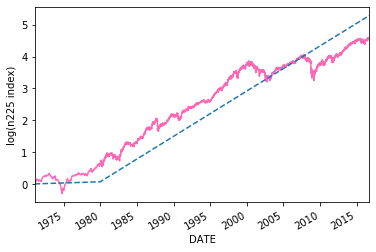

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader.data as pdr
import numpy as np
end='2016/9/30'
lnw5000 = np.log(web.DataReader("WILL5000INDFC", 'fred',"1949/5/16",end)).dropna()
lnw5000.columns=['Close']
plt.plot(lnw5000.Close,color='hotpink')
lnw5000["t"]=range(len(lnw5000))
model=sm.OLS(lnw5000.Close,lnw5000.t)
results=model.fit()
results.fittedvalues.plot(label='prediction',style='--')
plt.ylabel('log(n225 index)')

Text(0.5, 0, 'residual')

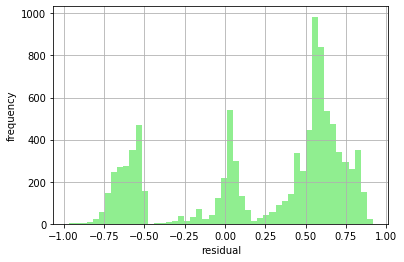

In [55]:
results.resid.hist(bins=50,color='lightgreen')
plt.ylabel('frequency')
plt.xlabel('residual')

In [56]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.770e+05
Date:                Sun, 10 May 2020   Prob (F-statistic):                        0.00
Time:                        13:14:47   Log-Likelihood:                         -7929.6
No. Observations:                9397   AIC:                                  1.586e+04
Df Residuals:                    9396   BIC:                                  1.587e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------